### Import necessary libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split , GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFECV 

### Collect Data and Load them
- First we need to collect the relevant data according to our problem.
- It means that we need to collect relevant (independent) data for (dependent) features to predictions.

In [66]:
# Load data using pandas
data = pd.read_csv('../data/Student_Performance.csv')

In [67]:
# load dataset first five rows
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,NaN,1,91
1,4,82,No,4.0,2,65
2,8,51,Yes,7.0,2,45
3,5,52,Yes,5.0,2,36
4,7,75,No,NaN,5,66


### Data Preproccessing(Data Cleaning)
- Handle missing data
- Covert categorical data into numerical data or boolean
- Drop duplicates
- Prepare the Data Set according to Problem Statment
- Divide data as features(independent) and target(dependent)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       9998 non-null   float64
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [69]:
# Convert categorical values into numberical or boolean values
new_data = pd.get_dummies(data, drop_first=True)

In [70]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,NaN,1,91,True
1,4,82,4.0,2,65,False
2,8,51,7.0,2,45,True
3,5,52,5.0,2,36,True
4,7,75,NaN,5,66,False


#### Check missing values

In [71]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         2
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [72]:
# Fill missing values with accoriding column mean or median
new_data.fillna(new_data.mean(), inplace=True)

In [73]:
new_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,6.530206,1,91,True
1,4,82,4.000000,2,65,False
2,8,51,7.000000,2,45,True
3,5,52,5.000000,2,36,True
4,7,75,6.530206,5,66,False


#### Find Duplicates and Drop them

In [74]:
print("Duplicate row count: ", new_data.duplicated().sum())

Duplicate row count:  127


In [75]:
#Drop Duplicates
new_data.drop_duplicates(inplace=True)

In [76]:
print("Duplicate row count: ", new_data.duplicated().sum())

Duplicate row count:  0


#### Rename columns for easily understand

In [77]:
new_data.columns = ["Study Hours", "Previous Score", "Sleep Hours", "Practiced Sample Paper Count", "Score", "Extracurricular Activities"]

#### Seperating features (X) and target (y) values

In [78]:
X = new_data.drop("Score", axis=1)
y = new_data.iloc[:, 4]

In [79]:
X.head()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Extracurricular Activities
0,7,99,6.530206,1,True
1,4,82,4.000000,2,False
2,8,51,7.000000,2,True
3,5,52,5.000000,2,True
4,7,75,6.530206,5,False


In [80]:
y.head()

0    91
1    65
2    45
3    36
4    66
Name: Score, dtype: int64

### Exploratory  Data Analysis (EDA)
- Analyze relationship between feature and target
- Using anlysis we can get predictions

In [81]:
new_data.describe()

,Study Hours,Previous Score,Sleep Hours,Practiced Sample Paper Count,Score
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531253,4.583004,55.216651
std,2.589081,17.325601,1.697437,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


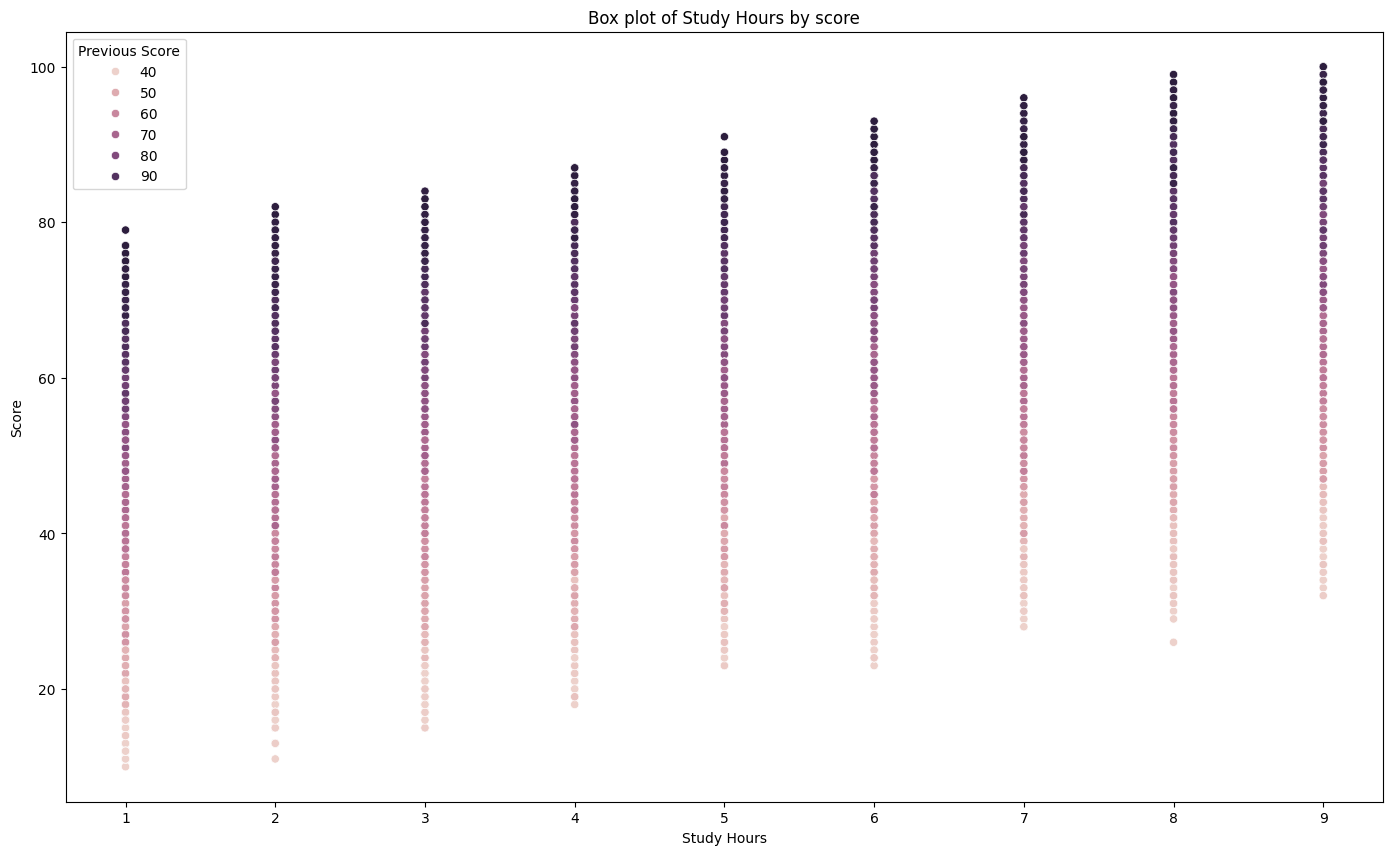

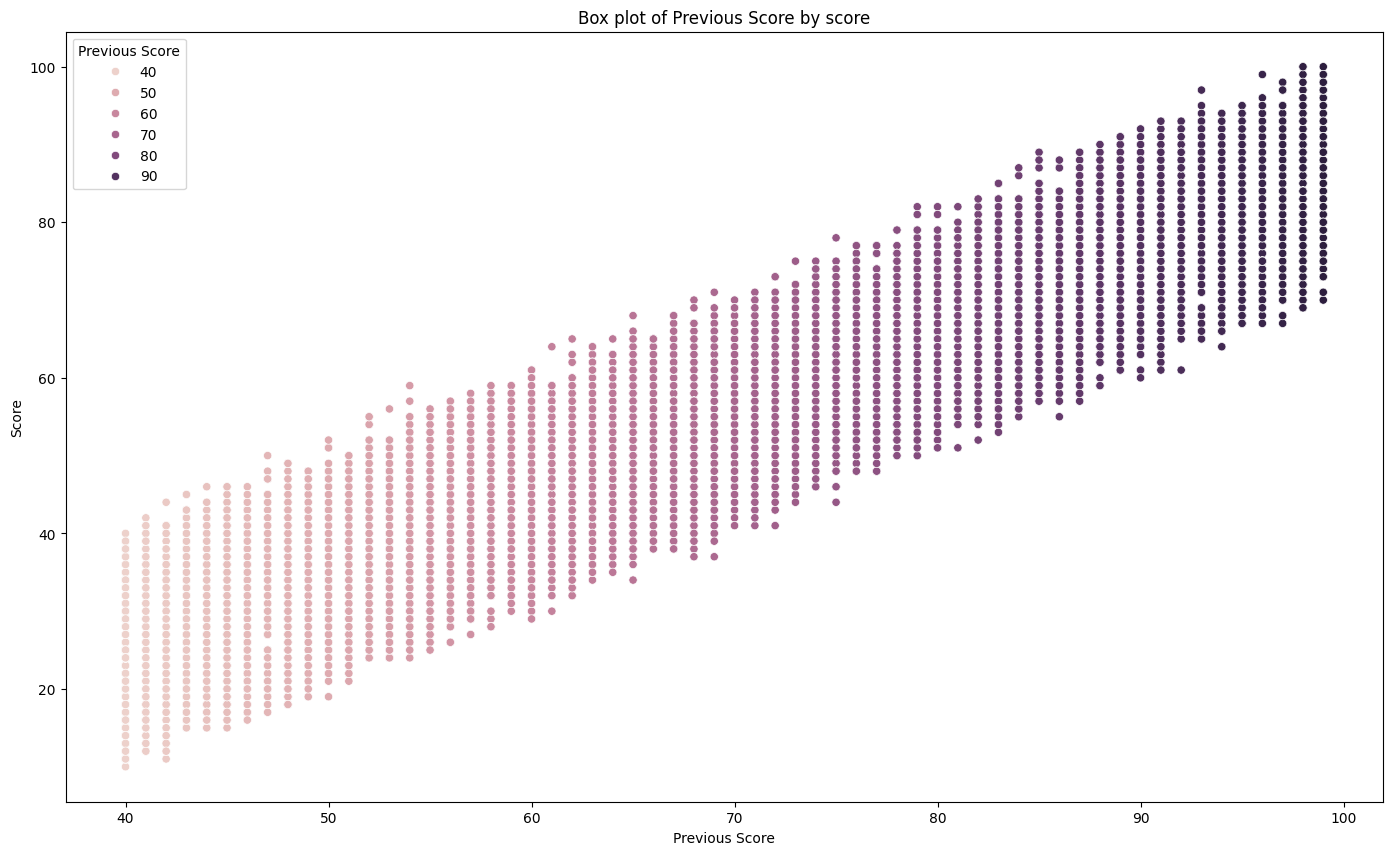

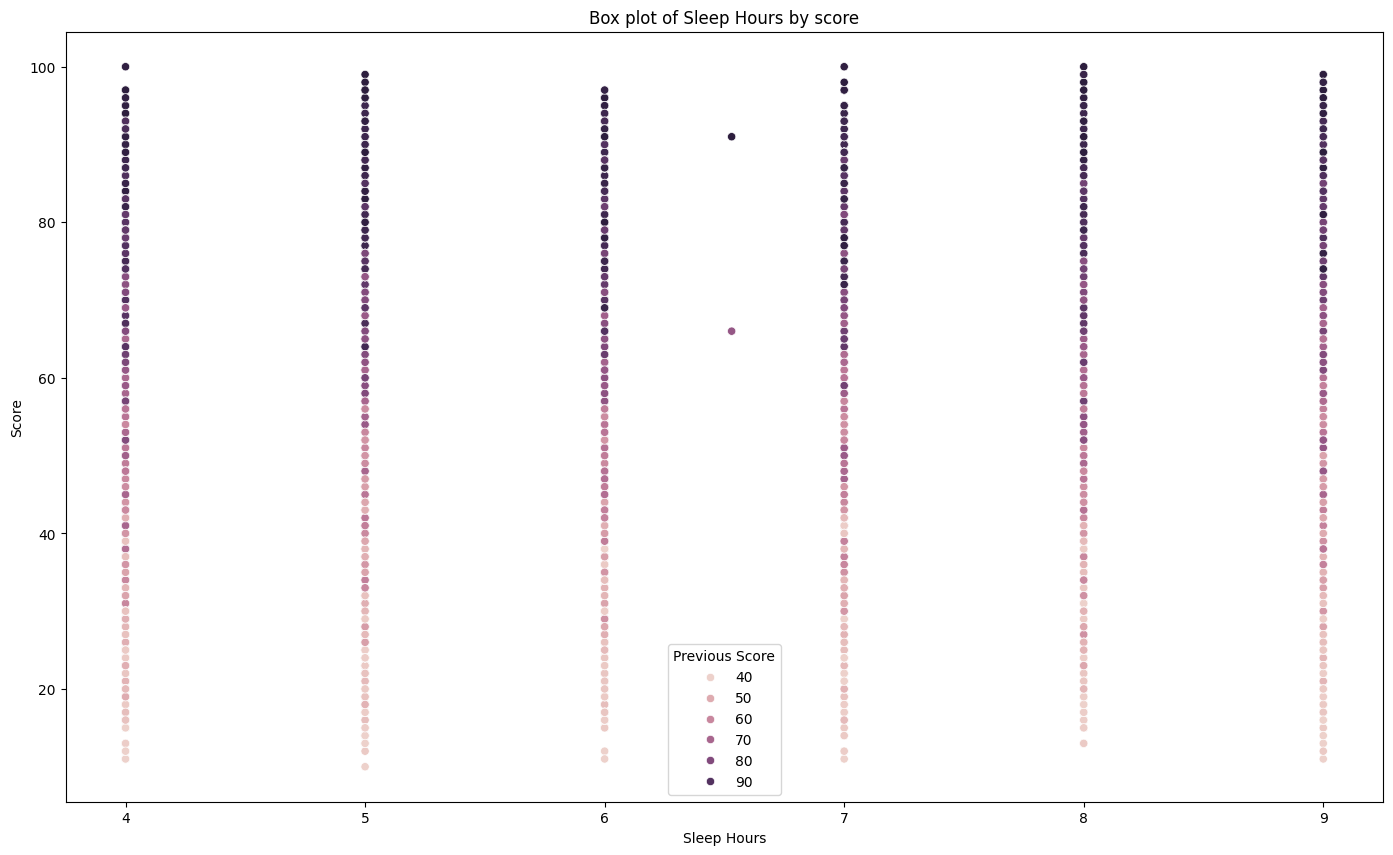

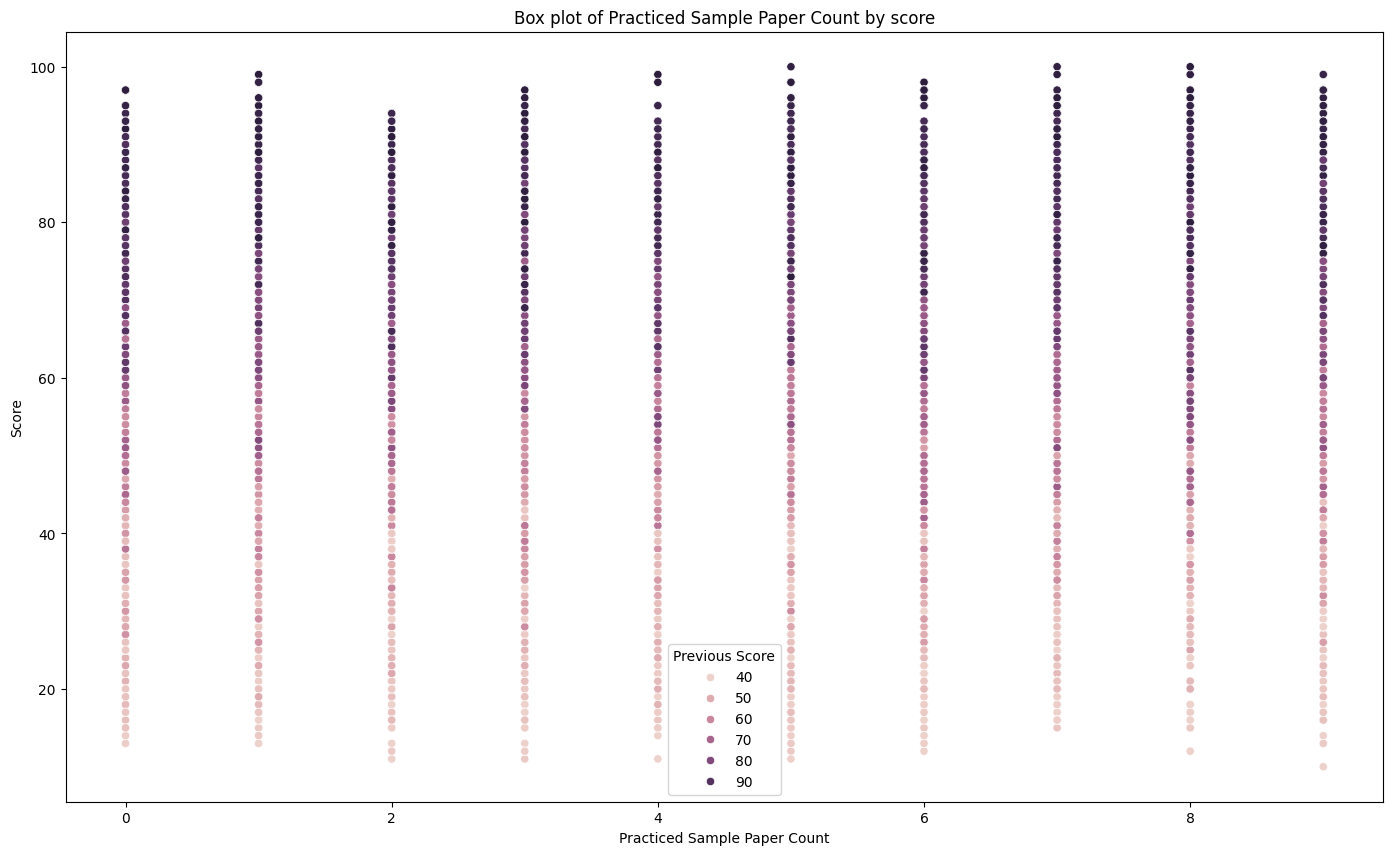

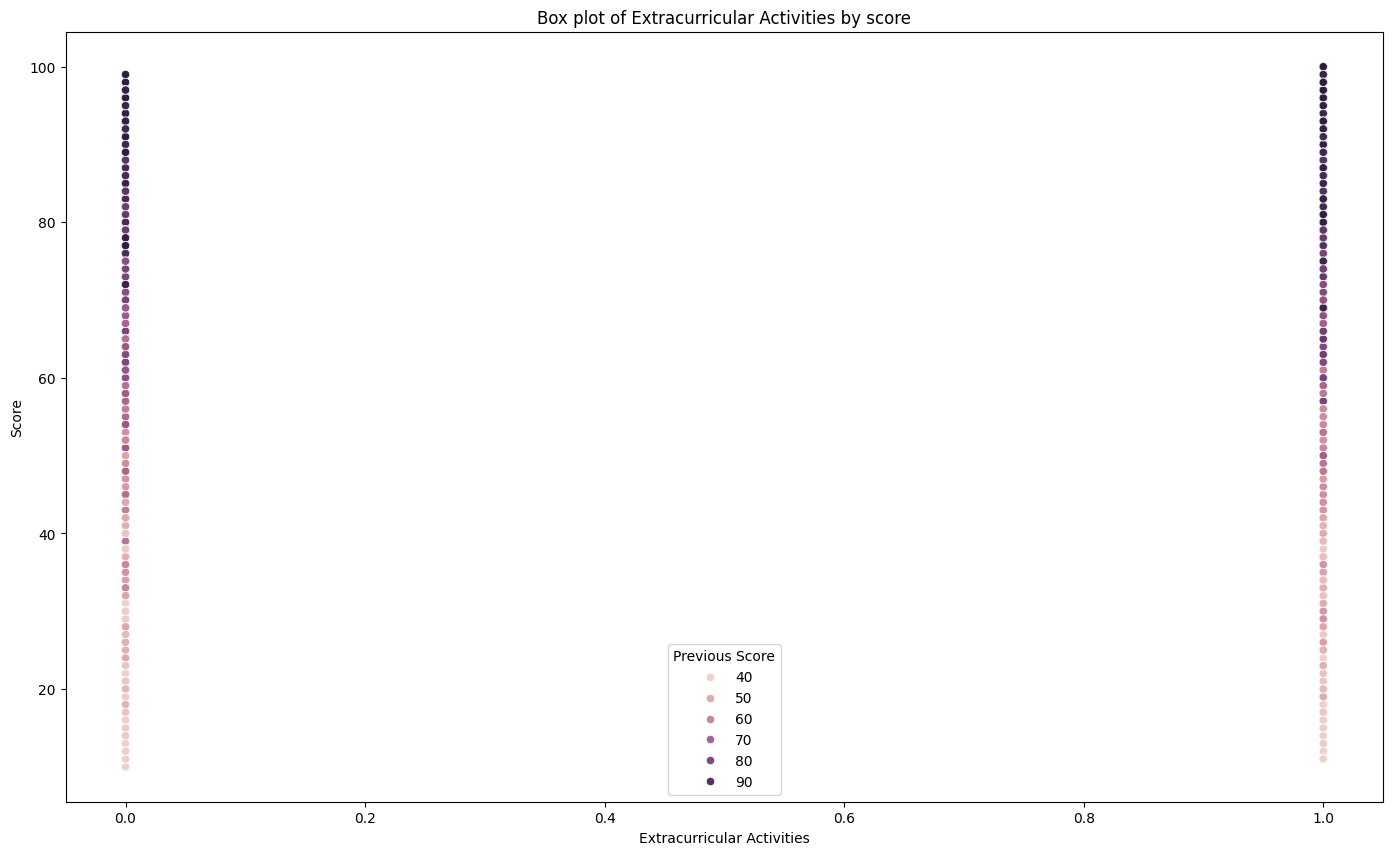

In [82]:
# Plotting scatter between features and targets

for cols in X.columns:
    plt.figure(figsize=(17, 10))
    sns.scatterplot(x=cols, y=y, data=new_data, hue= 'Previous Score')
    plt.title(f'Box plot of {cols} by score')
    plt.xlabel(cols)
    plt.ylabel('Score')
    plt.show()

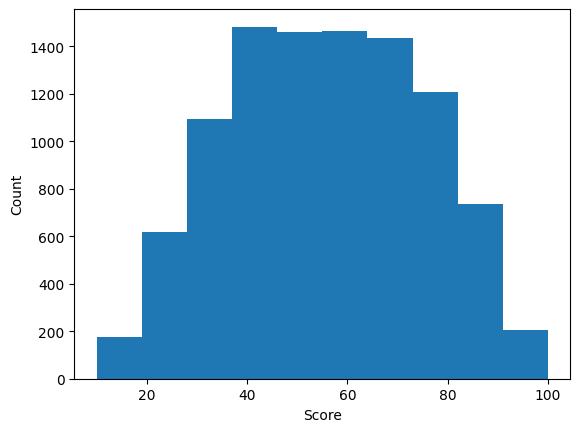

In [83]:
# Plotting score histogram for how many score count Scatterd around data
plt.hist(y, bins=10)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

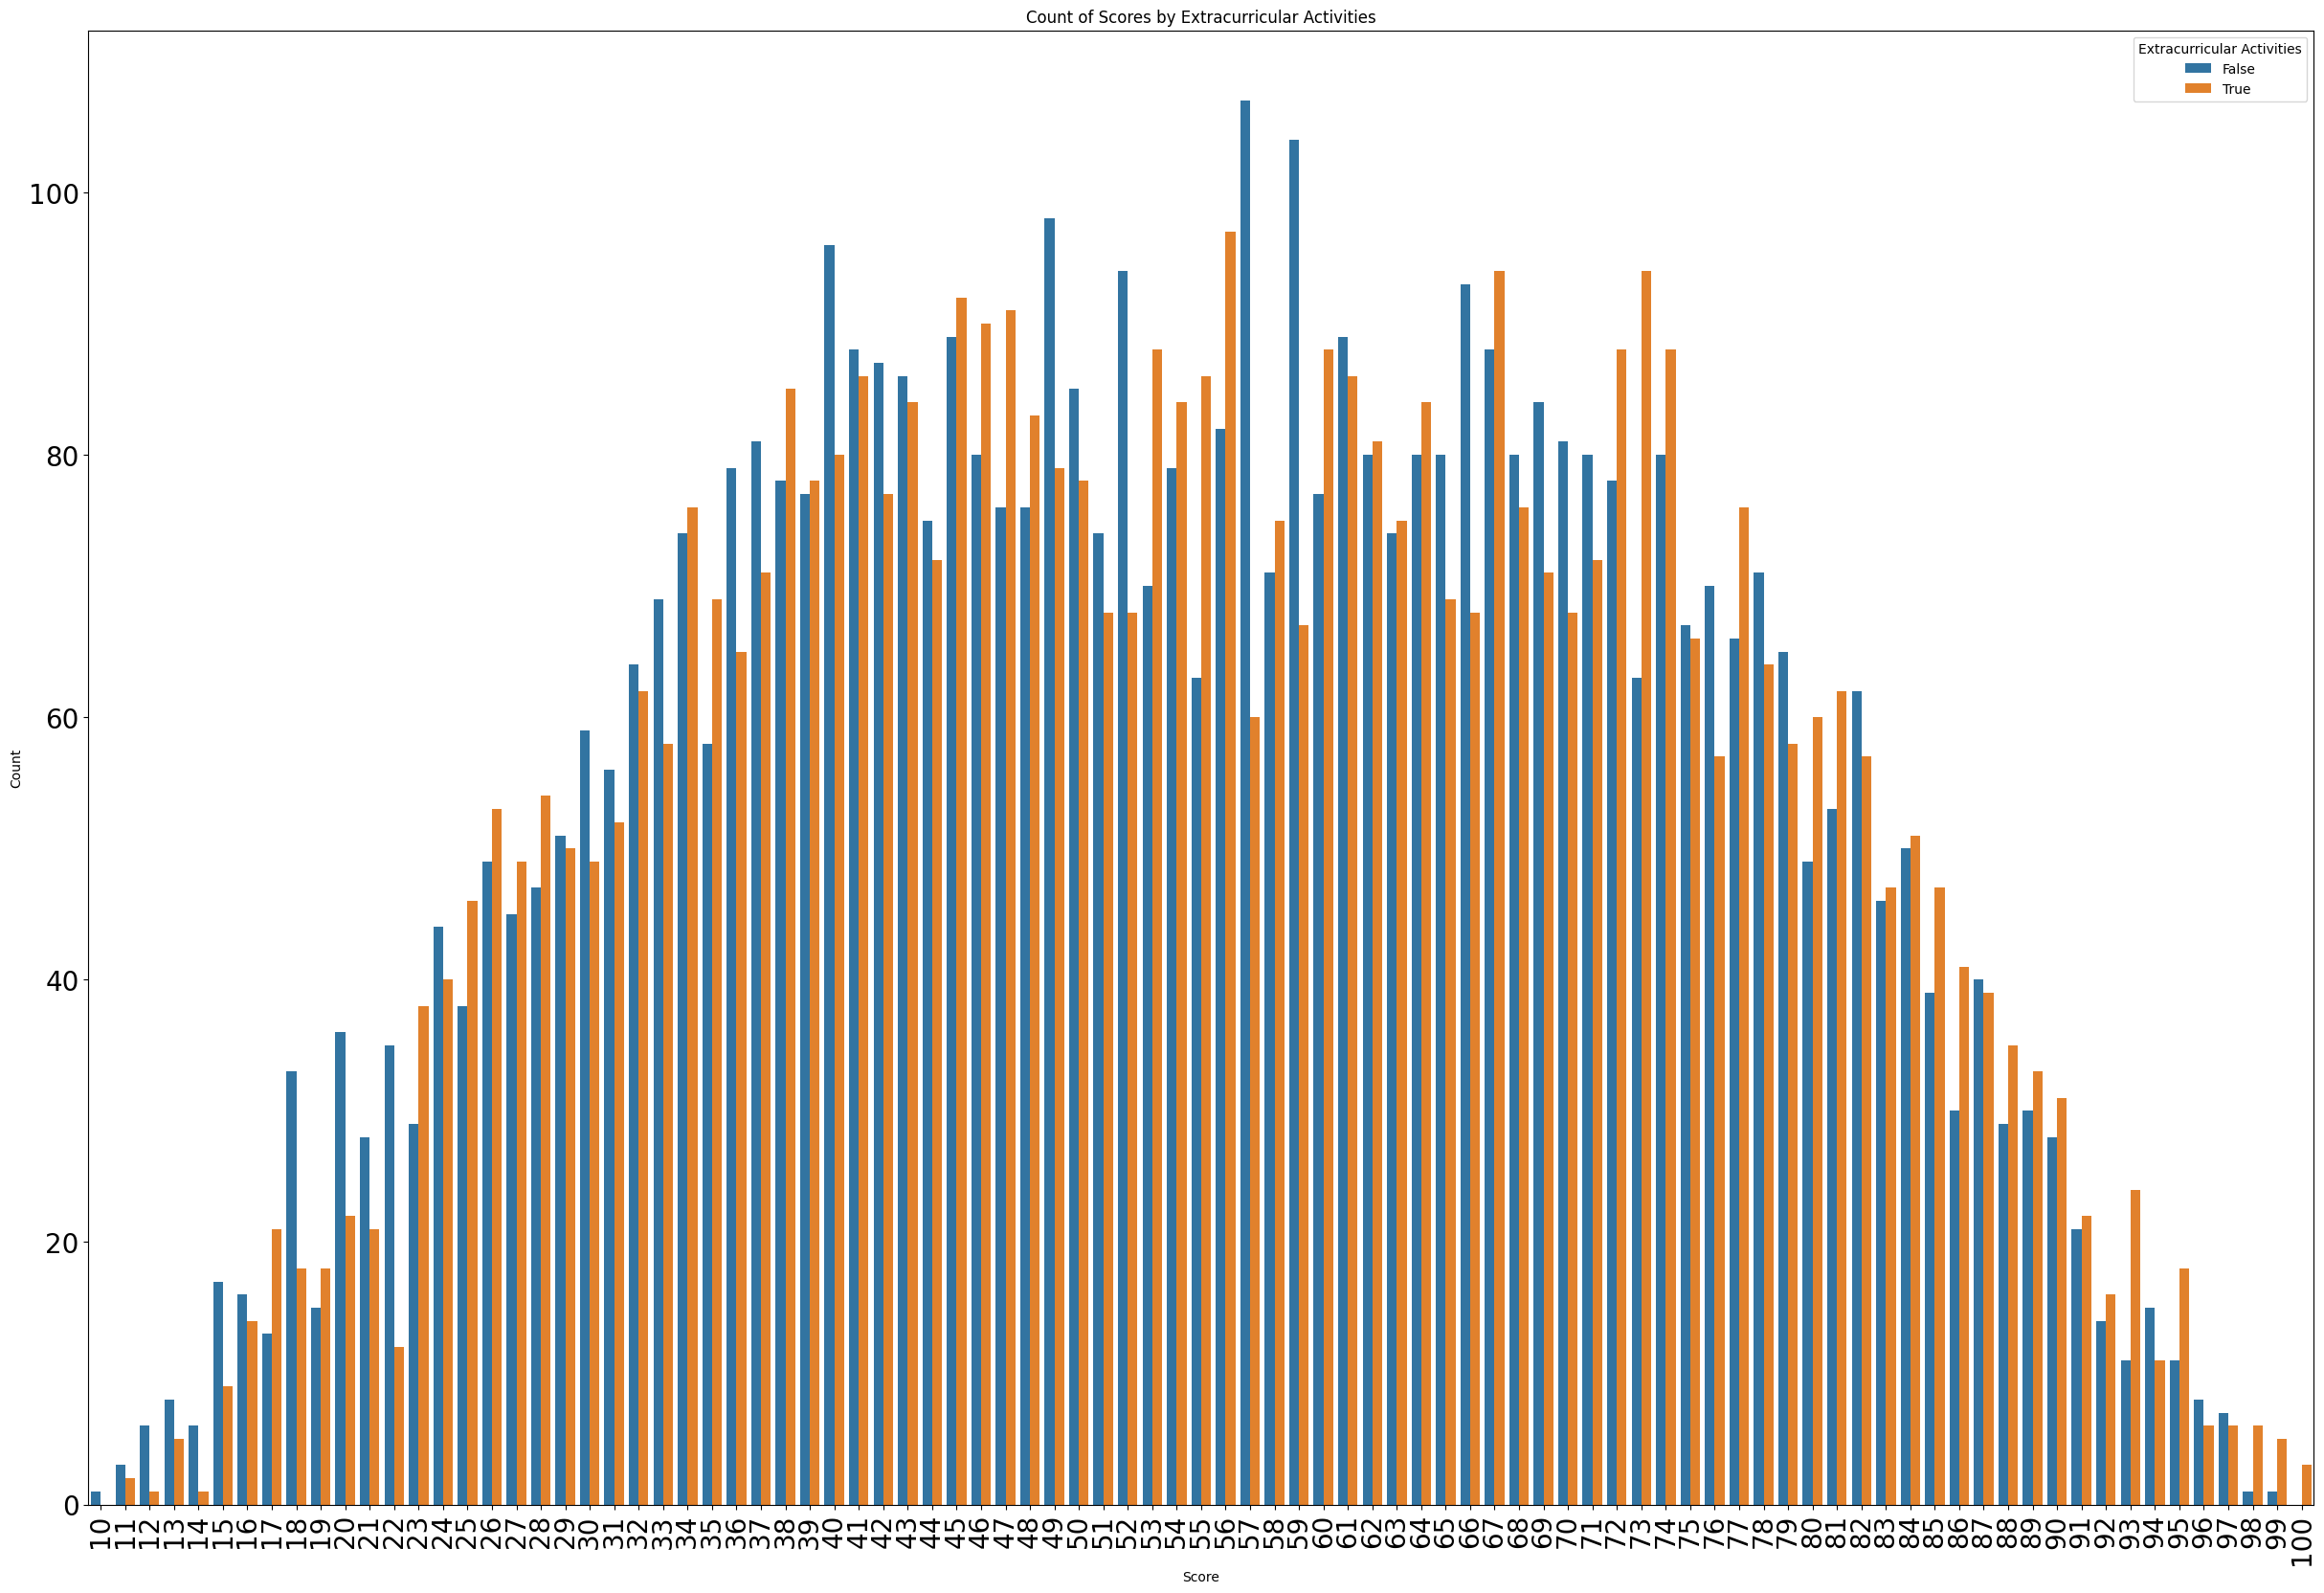

In [84]:
plt.figure(figsize=(30,20))
sns.countplot(x="Score", hue ="Extracurricular Activities", data=new_data)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Scores by Extracurricular Activities')
plt.xticks(rotation=90,  fontsize=20)
plt.yticks( fontsize=20)
plt.show()

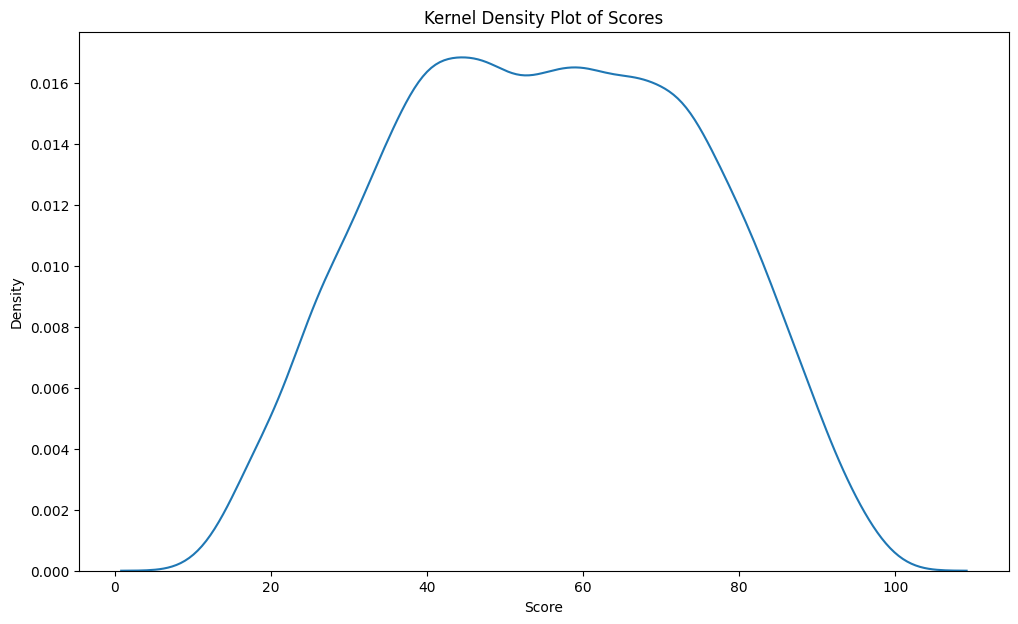

In [85]:
plt.figure(figsize=(12,7))
sns.kdeplot(data=new_data, x='Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Scores')
plt.show()

### Split the Data into training and testing
- Training data for train model
- Testing data for test our model accuracy

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Evaluate the Model 

In [87]:
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Checking model performance
- We can use mean squared error, mean absoulute error and R2 score for checking performance
- MSE measures avg of the squares of the errors - i.e, The avg squared difference between actual and predicted values
- Lower MSE values indicates a better fit, Since MSE in squared units of the response variable, it can be harder to interpret directly.
- R2, or coefficient of determination, indicates the proportion of variance in the dependent variable that is predictable from independent variable
- R2 ranges form  0 to 1. An R2 if 1 indicates the model is perfectly explains the varibility of the data around its mean, while R2 of 0 indicates that model does not explian any of variability
- we can check these thinhgs between trained and test data

In [89]:
# Get predicted values for our trained data
y_pred_train = model.predict(X_train)

# Get predicted values for our test data
y_pred_test = model.predict(X_test)

In [90]:
# Evalute metrics for trained and test data
mae_train = mean_absolute_error(y_train,y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [91]:
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R-squared: {r2_train:.2f}, Testing R-squared: {r2_test:.2f}")

Training MAE: 1.62, Testing MAE: 1.65
Training MSE: 4.14, Testing MSE: 4.31
Training R-squared: 0.99, Testing R-squared: 0.99


#####  We can get good understand using below residual plot how model residuals are spread around plot

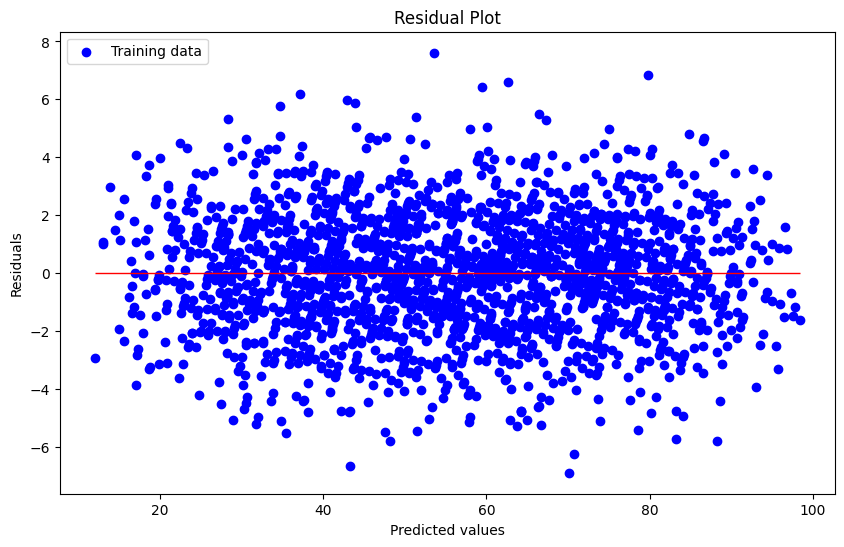

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, y_pred_test - y_test, c='blue', marker='o', label='Training data')
plt.hlines(y=0, xmin=np.min(y_pred_test), xmax=np.max(y_pred_test), colors='red', lw=1)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend(loc='upper left')
plt.show()

### Fine tuning the model
#### We can use some different techniques for develop model performance

- Feature Selection
- Hyperparameter Optiimization
- Regualarization
- Cross validation

### Feature Selection
Choose the most relevant features to include in model

In [94]:
# We can use recursive feature elimination method

RFE_CV = RFECV(estimator=model, min_features_to_select=1, cv=10)

In [95]:
results = RFE_CV.fit(X, y)

In [96]:
results.support_

array([ True,  True,  True,  True,  True])

In [97]:
selected_cols = X.columns[results.support_]

In [98]:
selected_cols

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

### Regularization
#### Apply techniques to prevent overfitting by adding penalty to model's complexity
- Ridge Regression: Add an L2 penalty to loss function.
- Lasso Regression: add an L1 penalty to loss function.
- Elastic Net: Combines both L1 and L2 penalties 

In [99]:
# let's see how to find best parameter for lasso and ridge regression 
parameters = {"alpha" : [0.0001, 0.001, 0.1, 1, 10, 100, 10000]}

In [100]:
lasso_model = Lasso()

In [101]:
ridge_model = Ridge()

### Hyperparameter Optimization
#### Optimize hyperparameters to improve model performance.
- Grid Search technique
- Random Search technique

In [102]:
# Grid Search
grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=parameters, cv = 10)
best_grid_param_lasso = grid_search_lasso.fit(X, y)
print("Best parameters for Lasso (Grid search): ",best_grid_param_lasso.best_params_)

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv = 10)
best_grid_param_ridge = grid_search_ridge.fit(X, y)
print("Best parameters for Lasso (Grid search): ",best_grid_param_ridge.best_params_)

Best parameters for Lasso (Grid search):  {'alpha': 0.0001}
Best parameters for Lasso (Grid search):  {'alpha': 1}


In [104]:
# Random Search
random_search_lasso = RandomizedSearchCV(estimator=lasso_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_lasso = random_search_lasso.fit(X, y)
print("Best parameters for Lasso (Random search): ", best_params_lasso.best_params_)

random_search_ridge = RandomizedSearchCV(estimator=ridge_model, param_distributions=parameters, cv=10, n_iter=7)
best_params_ridge = random_search_ridge.fit(X, y)
print("Best parameters for Ridge (Random search): ", best_params_ridge.best_params_)

Best parameters for Lasso (Random search):  {'alpha': 0.0001}
Best parameters for Ridge (Random search):  {'alpha': 1}


In [105]:
# We got alpha using hyperparameter optimization technique
lasso = Lasso(alpha=0.001)
ridge = Ridge(alpha=1)

In [106]:
lasso.fit(X_train, y_train)

,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [107]:
ridge.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [108]:
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.2f}")

Ridge Regression Mean Squared Error: 4.31


In [110]:
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.2f}")

Lasso Regression Mean Squared Error: 4.31


#### Now our model is ready to make predictions

In [111]:
X.columns

Index(['Study Hours', 'Previous Score', 'Sleep Hours',
       'Practiced Sample Paper Count', 'Extracurricular Activities'],
      dtype='object')

In [112]:
new_student_sample_data = np.array([6, 56, 7, 6, True]).reshape(1, 5)

In [113]:
prediction = model.predict(new_student_sample_data)
prediction_lasso = lasso.predict(new_student_sample_data)
prediction_ridge = ridge.predict(new_student_sample_data)

C:\Users\OMEN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\OMEN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\OMEN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [114]:
print("Student score :",prediction)
print("Student score :",prediction_lasso)
print("Student score :",prediction_ridge)

Student score : [45.16750752]
Student score : [45.16505225]
Student score : [45.16730055]


In [115]:
import joblib

joblib.dump(model, "../model/linear_model.pkl")
joblib.dump(lasso, "../model/lasso_model.pkl")
joblib.dump(ridge, "../model/ridge_model.pkl")

['../model/ridge_model.pkl']